# Model Selection : Random Forest
This part aims to assess the performances of the random forest model

In [3]:
library(randomForest)
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv")

In [68]:
column_to_drop<-c("X.1","X")
training_set<-training_set[,!(names(training_set) %in% column_to_drop)] # drop the desired columns
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns

In [70]:
training_set$id = factor(training_set$id) 
pump_classifier = randomForest(id ~ ., data=training_set, ntree=250,  mtry=28, importance=TRUE)
#bench (funder, installer, ward dropped)
#tree : 100 , split : 8 , error rate : 22.36% -> ~90% error rate at functional needs repair (worst class) (77% accuracy on val set)
#tree : 200 , split : 8 , error rate : 22.43%
#tree : 80 , split : 8, error rate : 22.49%
#tree : 100 , split : 10, error rate : 21.84%
#tree : 120 , split : 10, error rate : 21.82% 
#tree : 150 , split : 12, error rate : 21.47%  -> ~83% error rate ..... (78% acc. on val. set)
#tree : 120 , split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 8, error rate : 22.26% -> ~90% error rate at functional needs repair
#tree : 120, split : 20, error rate : 21.21% -> ~77% error rate at functional needs repair
#tree : 120, split : 35, error rate : 21.59% -> ~75% error rate at functional needs repair (78% accuracy on validation set)
#tree : 200, split : 25, error rate : 21.13% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 250, split : 28, error rate : 21.12% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 500, split : 25, error rate : 21.2% -> ~76% error rate at functional needs repair (78 % acc. on val. set-)
#(error rate = OOB)

# increasing tree number decreases the variance and keeps the bias constant -> good way to avoid overfitting




## For now : best parameters are at 250 trees and 28 random features per tree
### results -> 78% accuracy on validation set BUT still 75% of error rate for the 'functional needs repair' class

## Model Performances (OOB) :


Call:
 randomForest(formula = id ~ ., data = training_set, ntree = 250,      mtry = 28, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 28

        OOB estimate of  error rate: 21.12%
Confusion matrix:
                        functional functional needs repair non functional
functional                   22847                     449           2439
functional needs repair       1952                     836            612
non functional                4300                     237          13617
                        class.error
functional                0.1122207
functional needs repair   0.7541176
non functional            0.2499174

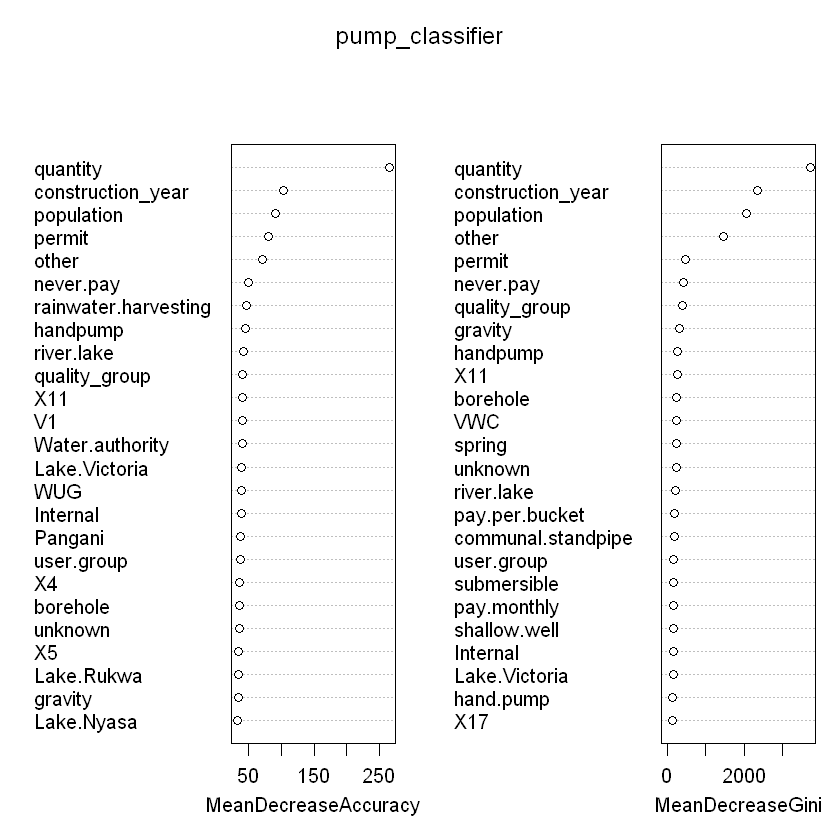

In [71]:
pump_classifier
varImpPlot(pump_classifier, n.var=min(25, nrow(pump_classifier$importance)))
# --> high mean decrease accuracy = variable having a high impact on accuracy

### The variables having the highest (positive) impact on model performances are : *quantity*, *construction_year*, *population* and *permit*

## Confusion Matrix on Validation Set :

In [72]:
library(ROCR)
pred <- predict(pump_classifier,validation_set) # Model prediction on validation set
dim(validation_set)
table(observed=validation_set$id,predicted=pred) # CONFUSION MATRIX ON VALIDATION SET

[1] 12111    81

                         predicted
observed                  functional functional needs repair non functional
  functional                    5747                     152            624
  functional needs repair        537                     237            143
  non functional                1146                      53           3471